In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
print(df.head())

   fever  cold  rigor  fatigue  headace  bitter  vomitting  diarrhea  \
0      1     1      0        1        1       1          0         1   
1      1     1      1        1        1       1          0         1   
2      1     1      1        1        1       0          0         1   
3      1     1      0        1        0       0          0         0   
4      1     1      1        0        1       0          0         0   

   Convulsion  Anemia  jundice  cocacola  hypoglycemia  prostraction  \
0           1       0        1         1             1             0   
1           0       0        0         1             1             0   
2           1       0        0         1             1             0   
3           0       0        1         0             1             0   
4           1       0        1         1             1             0   

   hyperpyrexia  maleria  
0             0        0  
1             0        0  
2             0        1  
3             1        0  

In [ ]:
# view dimensions of dataset
df.shape

(1011, 16)

In [ ]:
# let's preview the dataset
df.head()

,fever,cold,rigor,fatigue,headace,bitter,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola,hypoglycemia,prostraction,hyperpyrexia,maleria
0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [ ]:
df.columns

Index(['fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter', 'vomitting',
       'diarrhea', 'Convulsion', 'Anemia', 'jundice', 'cocacola',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'maleria'],
      dtype='object')

In [ ]:
df['maleria'].value_counts()

maleria
0    663
1    348
Name: count, dtype: int64

In [ ]:
X = df.drop(['maleria'], axis=1)

y = df['maleria']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Create and train the Naïve Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Step 6: Make predictions on the training set
y_train_pred = naive_bayes_classifier.predict(X_train)
y_pred = naive_bayes_classifier.predict(X_test)
# Step 8: Evaluate the performance of the model
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Training Accuracy: 0.61
Testing Accuracy: 0.62


In [ ]:
y_pred = naive_bayes_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.62


[[92 42]
 [36 33]]


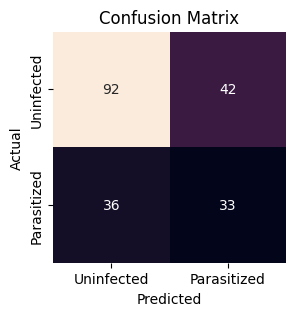

In [ ]:
#Confusion Matrix - verify accuracy of each class
import sys
from sklearn.metrics import confusion_matrix
nClasses = ['Uninfected','Parasitized']
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(y_test, y_pred, target_names=['Uninfected(Class 0)','Parasitized(Class 1)']))

                      precision    recall  f1-score   support

 Uninfected(Class 0)       0.72      0.69      0.70       134
Parasitized(Class 1)       0.44      0.48      0.46        69

            accuracy                           0.62       203
           macro avg       0.58      0.58      0.58       203
        weighted avg       0.62      0.62      0.62       203



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

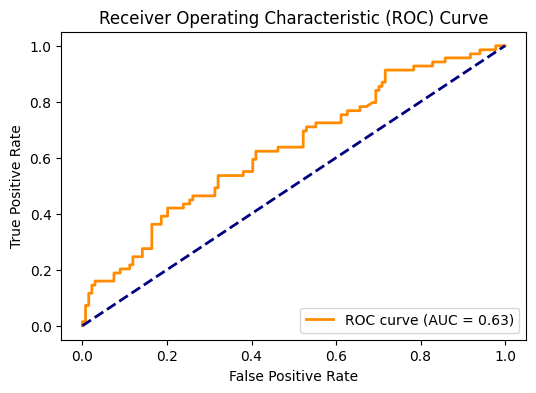

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **precision_recall_curve**

[[92 42]
 [36 33]]


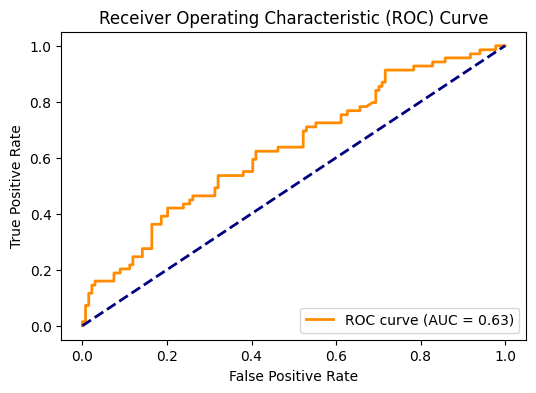

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming svc is the trained Support Vector Machine model
# and X_test, y_test are the test data and labels
y_pred = naive_bayes_classifier.predict(X_test)
y_pred_proba = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Step 1: Compute ROC and AUC for binary classification
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 2: Compute Precision-Recall curve and average precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Step 3: Compute AUC for Precision-Recall curve (AUC-PR)
pr_auc = auc(recall, precision)

# Step 4: Compute confusion matrix
nClasses = ['Uninfected', 'Parasitized']
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

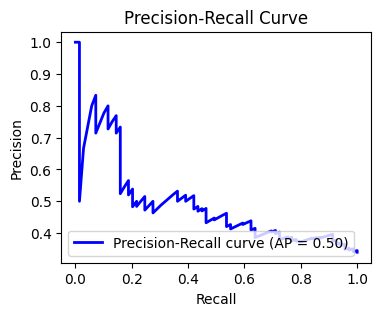

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision',)
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

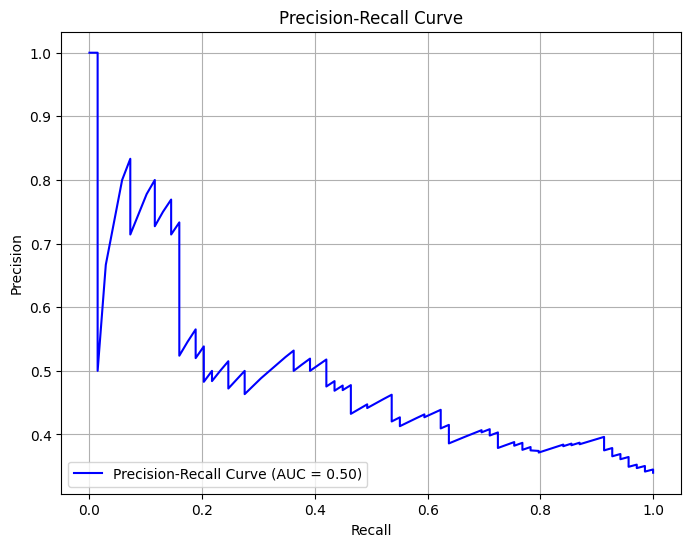

In [ ]:
# Plot precision-recall curve
auc_pr = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()